In [3]:
from resram_core import *
from tqdm.notebook import tqdm
import time

c:\Users\Kent\OneDrive - University of Rochester\Documents\Lab\fsrsanalysis\resram_ipynb\resram_core.py:635: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig_raman.show()
c:\Users\Kent\OneDrive - University of Rochester\Documents\Lab\fsrsanalysis\resram_ipynb\resram_core.py:670: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig_profs.show()
c:\Users\Kent\OneDrive - University of Rochester\Documents\Lab\fsrsanalysis\resram_ipynb\resram_core.py:681: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig_abs.show()


Elapsed time: 8.465590715408325 seconds


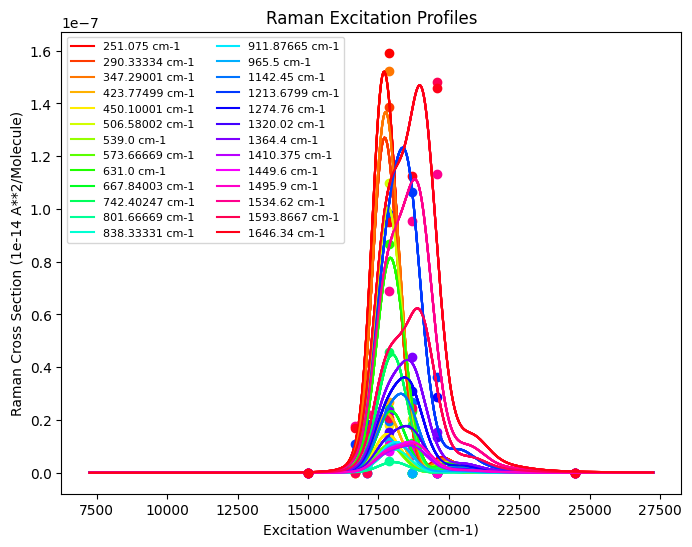

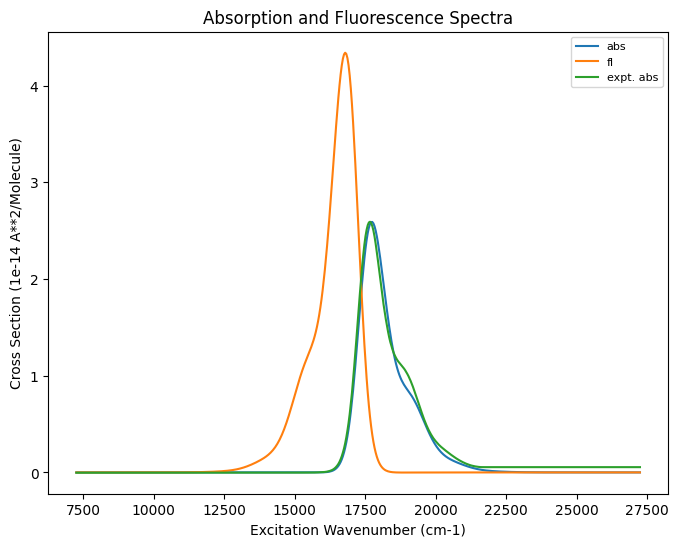

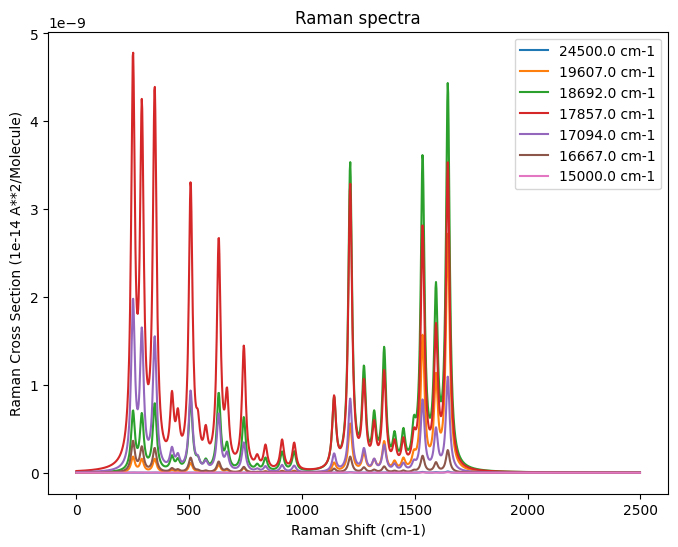

In [4]:
start_time = time.time()
for i in range(30):
    data = resram_data()#load input data from current directory
data.plot()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

In [5]:
start_time = time.time()
for i in range(100):
    fit_obj = load_input()
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")
print(fit_obj.rp)

Elapsed time: 0.4367225170135498 seconds
[430 308 285 265 246 235 193]


<Parameter 'delta0', value=0.7748604270679489, bounds=[0.0:1.0]>
<Parameter 'delta1', value=0.6409960961625931, bounds=[0.0:1.0]>
<Parameter 'delta2', value=0.5872857740485251, bounds=[0.0:1.0]>
<Parameter 'delta3', value=0.20719247724224388, bounds=[0.0:1.0]>
<Parameter 'delta4', value=0.1607544533791192, bounds=[0.0:1.0]>
<Parameter 'delta5', value=0.3893313623373211, bounds=[0.0:1.0]>
<Parameter 'delta6', value=0.12074773193374017, bounds=[0.0:1.0]>
<Parameter 'delta7', value=0.11603393193686784, bounds=[0.0:1.0]>
<Parameter 'delta8', value=0.30537623378500867, bounds=[0.0:1.0]>
<Parameter 'delta9', value=0.15836620976768084, bounds=[0.0:1.0]>
<Parameter 'delta10', value=0.20742166396327966, bounds=[0.0:1.0]>
<Parameter 'delta11', value=0.060015796848877534, bounds=[0.0:1.0]>
<Parameter 'delta12', value=0.08745576005571493, bounds=[0.0:1.0]>
<Parameter 'delta13', value=0.0968567706185624, bounds=[0.0:1.0]>
<Parameter 'delta14', value=0.0916268892643442, bounds=[0.0:1.0]>
<Parameter 

Fitting progress:   0%|          | 0/100 [00:00<?, ?it/s]

[[Fit Statistics]]
    # fitting method   = COBYLA
    # function evals   = 100
    # data points      = 3
    # variables        = 30
    chi-square         = 0.05150164
    reduced chi-square = 0.05150164
    Akaike info crit   = 47.8057383
    Bayesian info crit = 20.7641070
##  Warning: uncertainties could not be estimated:
[[Variables]]
    delta0:             0.65576515 (init = 0.7748604)
    delta1:             0.68011010 (init = 0.6409961)
    delta2:             0.52086726 (init = 0.5872858)
    delta3:             0.04051769 (init = 0.2071925)
    delta4:             0.08731071 (init = 0.1607545)
    delta5:             0.38170554 (init = 0.3893314)
    delta6:             0.11989742 (init = 0.1207477)
    delta7:             0.11410878 (init = 0.1160339)
    delta8:             0.29874730 (init = 0.3053762)
    delta9:             0.20169679 (init = 0.1583662)
    delta10:            0.20124691 (init = 0.2074217)
    delta11:            0.11107437 (init = 0.0600158)
    delt

c:\Users\Kent\OneDrive - University of Rochester\Documents\Lab\fsrsanalysis\resram_ipynb\resram_core.py:635: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig_raman.show()
c:\Users\Kent\OneDrive - University of Rochester\Documents\Lab\fsrsanalysis\resram_ipynb\resram_core.py:670: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig_profs.show()
c:\Users\Kent\OneDrive - University of Rochester\Documents\Lab\fsrsanalysis\resram_ipynb\resram_core.py:681: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig_abs.show()


NameError: name 'current_time_str' is not defined

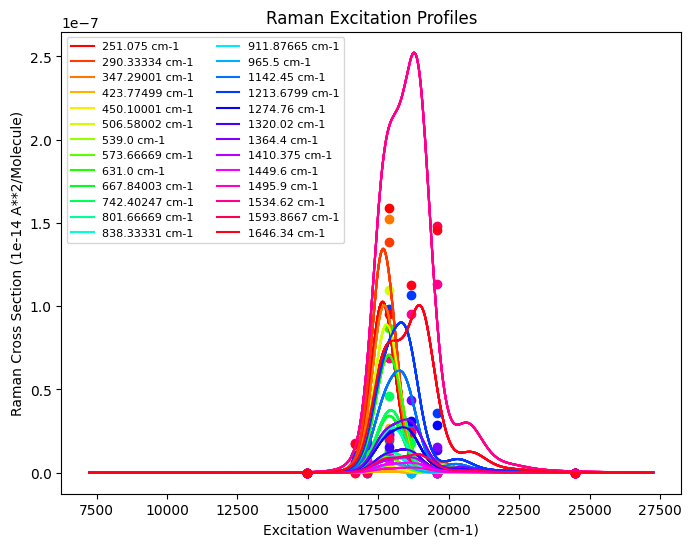

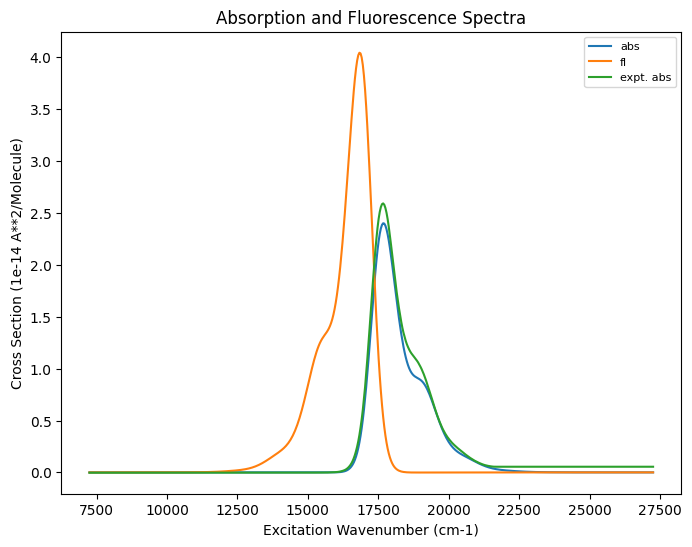

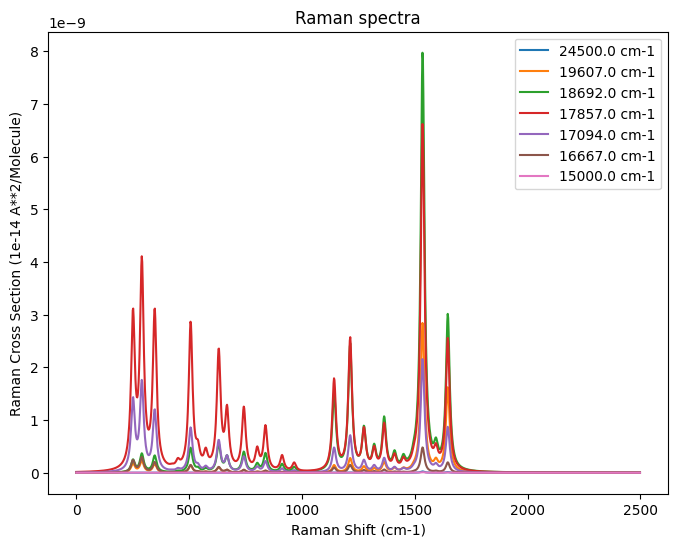

In [8]:
correlation, total_sigma = 0, 10000
fit_obj = load_input() # Initialize the 'fit_obj' object of class 'load_input' .Load from input files in root dir or specified dir

fit_switch = np.ones(len(fit_obj.delta)+7)
fit_switch[len(fit_obj.delta)] = 1  # fit gamma?
fit_switch[len(fit_obj.delta)+1] = 1  # fit M?
fit_switch[len(fit_obj.delta)+2] = 1  # fit theta?
fit_switch[len(fit_obj.delta)+3] = 1  # fit kappa?
fit_switch[len(fit_obj.delta)+5] = 0  # fit E0?

correlation_list = []   # Initialize an empty list to store uvvis correlation values
sigma_list = [] # Initialize an empty list to store raman prof sigma values
loss_list = []  # Initialize an empty list to store total loss values
params_lmfit = param_init(fit_switch,fit_obj)   # Initialize parameters for fitting using 'param_init' function
# params_lmfit.add('gamma',value = 600,min = 400, max = 900)
# params_lmfit.add('transition_length',value = 1.83,min = 1.5, max = 2.3)
for name in params_lmfit.keys():
    print(params_lmfit[name])
raman_residual(params_lmfit)   # Calculate initial residuals for Raman spectroscopy
fit_kws = dict(tol=1e-9)    # Set fitting tolerance
max_nfev = 100    # Set maximum number of function evaluations
# Initialize tqdm progress bar for fitting process
with tqdm(total=max_nfev, desc="Fitting progress") as pbar:
    def update_progress(params, iteration, resid,args):
        # Update tqdm progress bar with fitting information
        global correlation, total_sigma
        pbar.update(1)
        #print(iteration,resid,args)
        pbar.set_description(
            f"Iteration {iteration}, Total Residual: {resid[0]:.7f}, Abs_corr: {correlation:.7f}, raman_sigma: {total_sigma:.7f}, delta: {fit_obj.delta}, M: {fit_obj.M}, Theta: {fit_obj.theta}, Kappa: {fit_obj.k}, E0: {fit_obj.E0}")
     # Perform the fitting using lmfit.minimize function
    result = lmfit.minimize(raman_residual, params_lmfit, args=(fit_obj,), method='cobyla', **fit_kws,
                            max_nfev=max_nfev, iter_cb=update_progress)  # max_nfev = 10000000, **fit_kws

print(lmfit.fit_report(result))
delta_fit = fit_obj.delta.copy()
output = run_save(fit_obj)  # save all parameters and results to a new folder
output.plot()
np.savetxt(current_time_str+"_data/corr_list.dat", correlation_list)
np.savetxt(current_time_str+"_data/sigma_list.dat", sigma_list)
np.savetxt(current_time_str+"_data/loss_list", loss_list)
#np.savetxt(current_time_str+"_data/delta_fit.dat",delta_fit,delimiter = "\t") #save deltas. already saved with run_save()
'''
plt.plot(np.arange(len(correlation_list)), np.array(
    correlation_list)*50, label='correlation*50')
plt.plot(np.arange(len(sigma_list)), sigma_list, label='sigma')
plt.plot(np.arange(len(loss_list)), loss_list, label='loss')
plt.legend(loc='best')
plt.show()'''


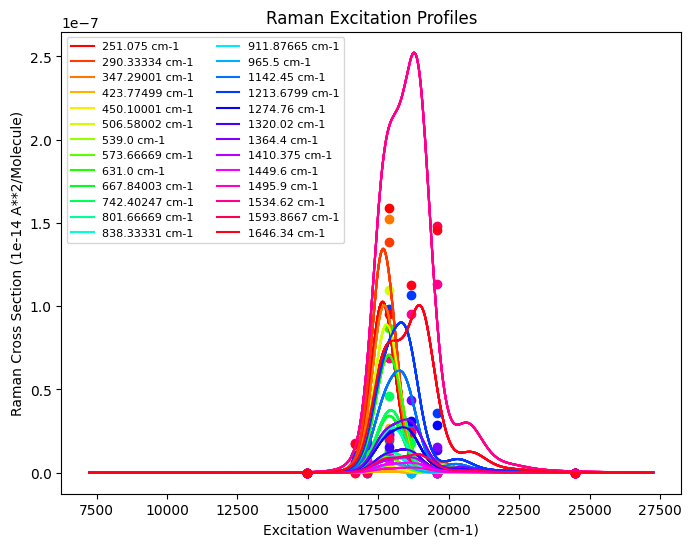

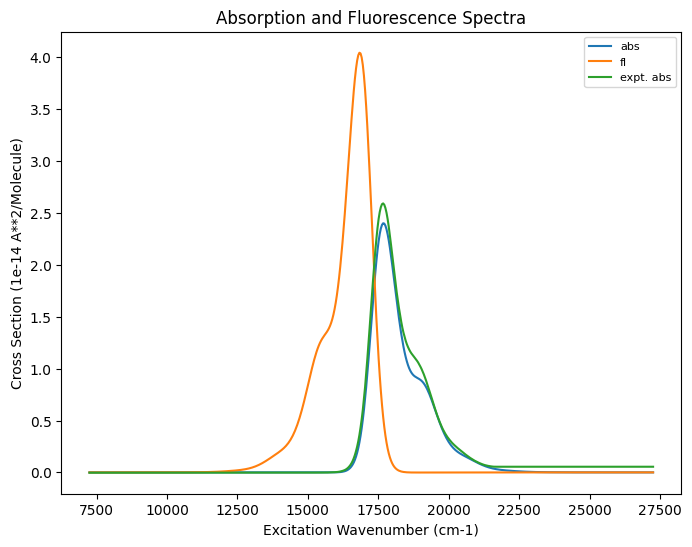

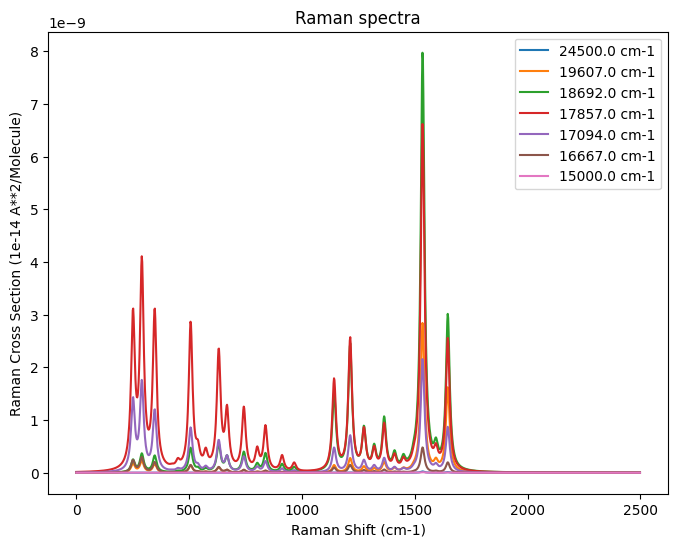

In [24]:
output.plot()

C:\Users\kentc\AppData\Local\Temp\ipykernel_17760\1533908424.py:514: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_raman.show()
C:\Users\kentc\AppData\Local\Temp\ipykernel_17760\1533908424.py:547: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_profs.show()
C:\Users\kentc\AppData\Local\Temp\ipykernel_17760\1533908424.py:558: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_abs.show()


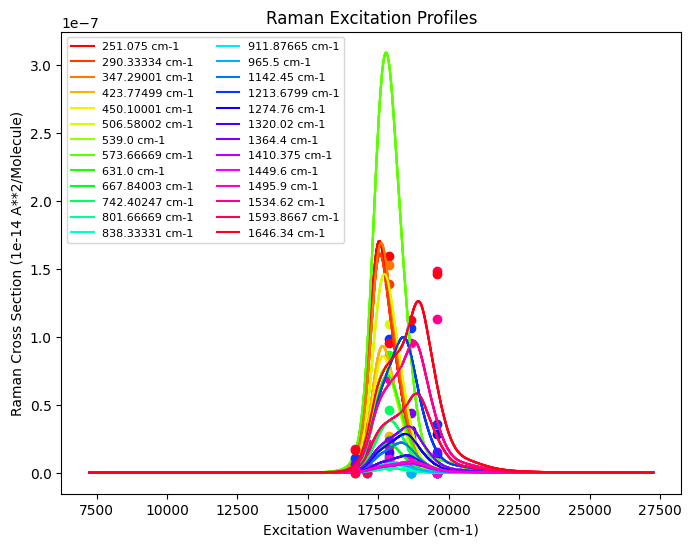

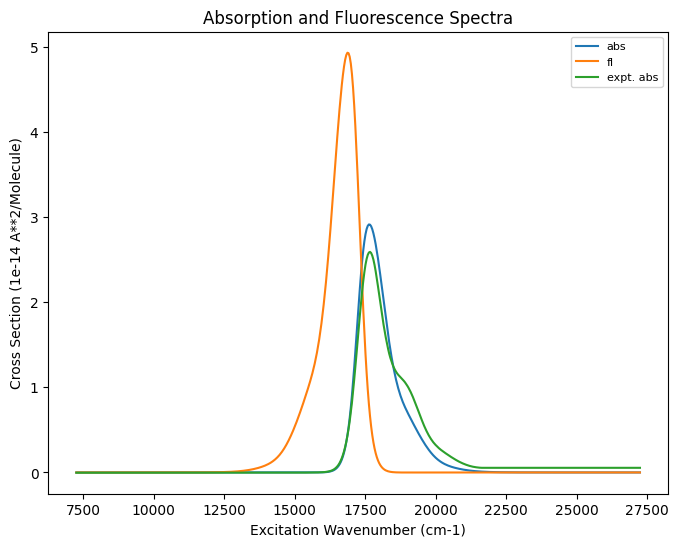

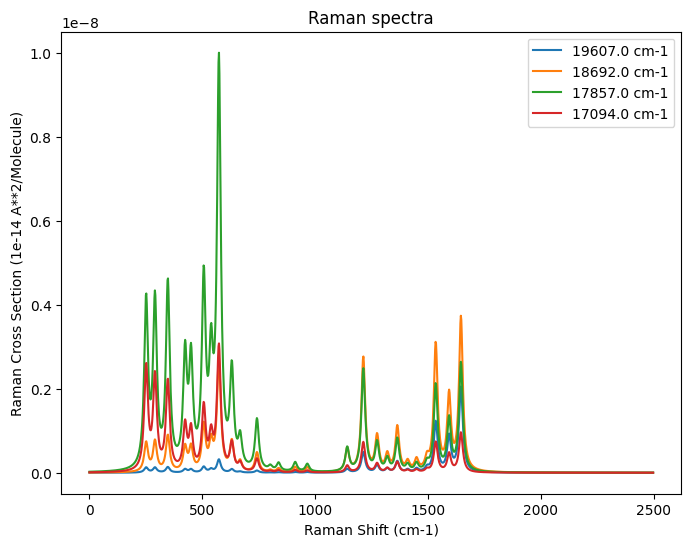

In [ ]:
load("freqs.dat","deltas.dat","rpumps.dat","inp.txt")
output = run_save()
output.plot()

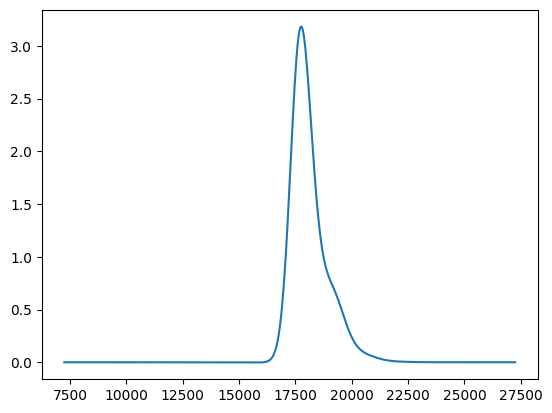

In [ ]:
plt.plot(convEL,np.real(abs_cross))
plt.show()

[-8.31604862e-06 -8.45661636e-06 -8.59965662e-06 -8.74522029e-06
 -8.89335947e-06 -9.04412751e-06 -9.19757908e-06 -9.35377019e-06
 -9.51275820e-06 -9.67460188e-06 -9.83936147e-06 -1.00070987e-05
 -1.01778768e-05 -1.03517606e-05 -1.05288167e-05 -1.07091130e-05
 -1.08927195e-05 -1.10797078e-05 -1.12701513e-05 -1.14641254e-05
 -1.16617073e-05 -1.18629763e-05 -1.20680136e-05 -1.22769027e-05
 -1.24897291e-05 -1.27065807e-05 -1.29275475e-05 -1.31527221e-05
 -1.33821994e-05 -1.36160770e-05 -1.38544548e-05 -1.40974356e-05
 -1.43451250e-05 -1.45976314e-05 -1.48550660e-05 -1.51175433e-05
 -1.53851808e-05 -1.56580991e-05 -1.59364223e-05 -1.62202780e-05
 -1.65097972e-05 -1.68051146e-05 -1.71063687e-05 -1.74137020e-05
 -1.77272610e-05 -1.80471962e-05 -1.83736626e-05 -1.87068196e-05
 -1.90468313e-05 -1.93938663e-05 -1.97480984e-05 -2.01097062e-05
 -2.04788740e-05 -2.08557910e-05 -2.12406523e-05 -2.16336590e-05
 -2.20350178e-05 -2.24449420e-05 -2.28636511e-05 -2.32913714e-05
 -2.37283361e-05 -2.41747

C:\Users\kentc\AppData\Local\Temp\ipykernel_2124\979718115.py:152: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_raman.show()
C:\Users\kentc\AppData\Local\Temp\ipykernel_2124\979718115.py:180: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_profs.show()
C:\Users\kentc\AppData\Local\Temp\ipykernel_2124\979718115.py:187: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_abs.show()


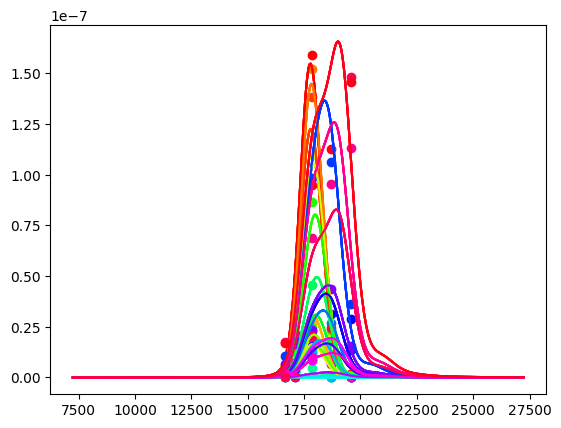

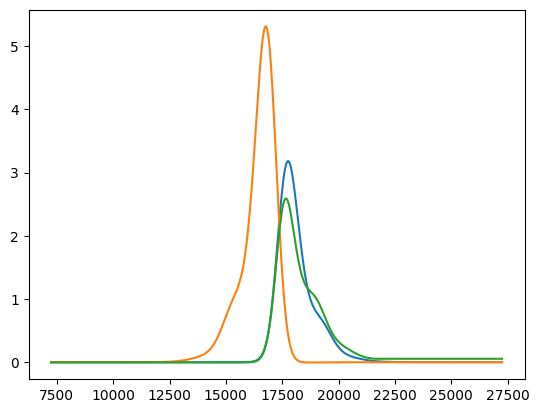

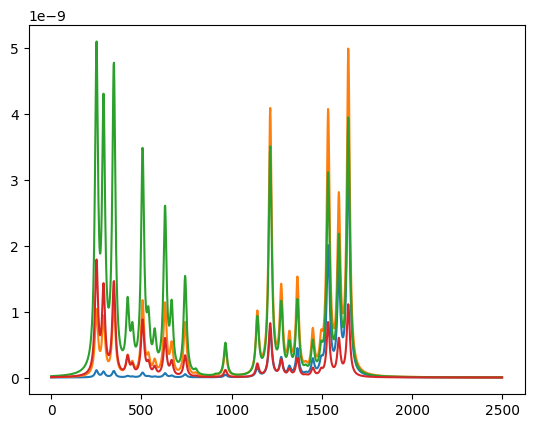

In [ ]:
output = resram_data('20231112_17-09-42_data/')
print(output.abs)
output.plot()



C:\Users\Kent\AppData\Local\Temp\ipykernel_28656\162135498.py:701: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig_raman.show()
C:\Users\Kent\AppData\Local\Temp\ipykernel_28656\162135498.py:736: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig_profs.show()
C:\Users\Kent\AppData\Local\Temp\ipykernel_28656\162135498.py:747: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig_abs.show()


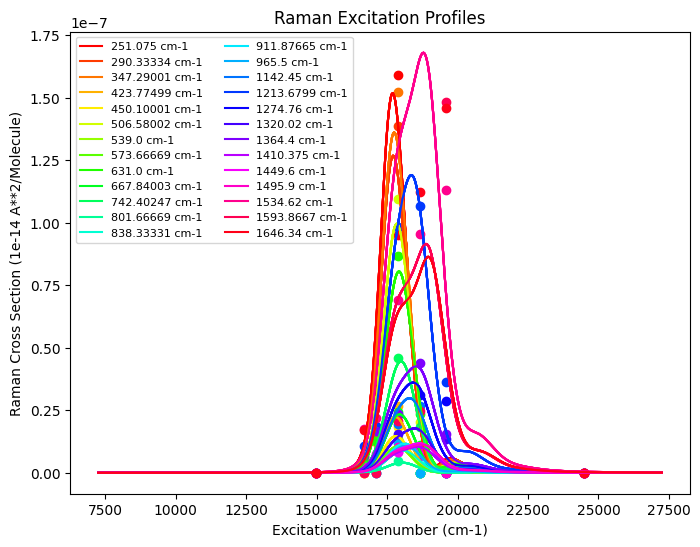

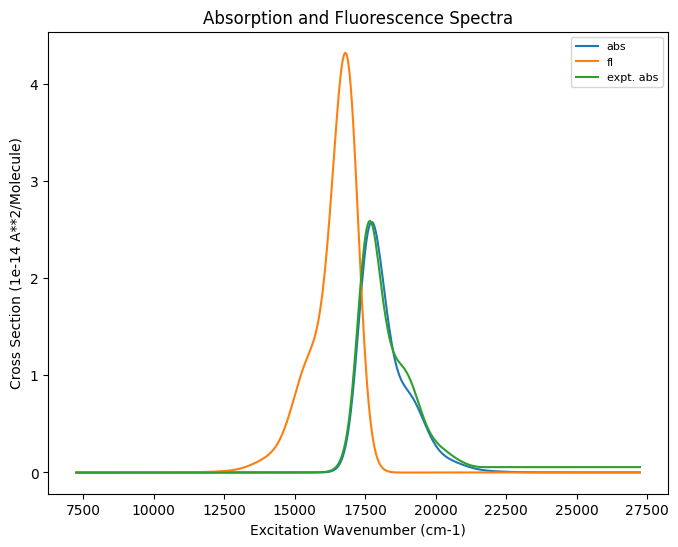

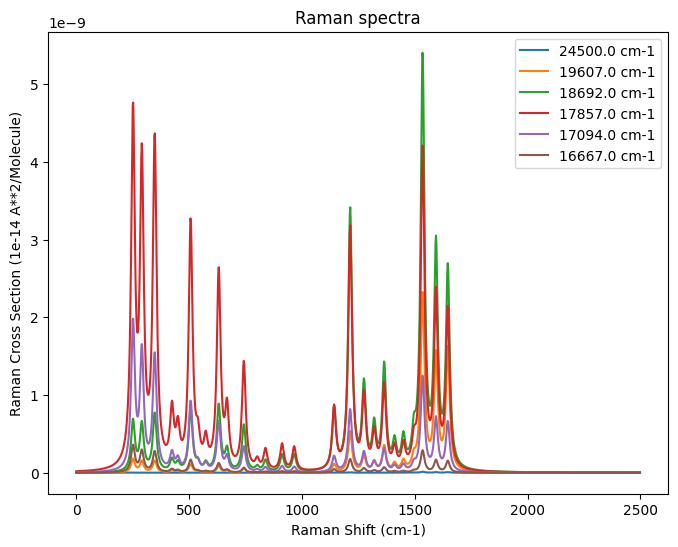

In [ ]:
#run_save(fit_obj)
output =  resram_data('20231118_00-09-25_data') 
output.plot()